# Weekly exercise
This week you'll be provided with a set of stereo images, and your task is to undistort and rectify the images, such that they can be used with the stereo depth reconstruction you made on day 6. You are still not allowed to use opencv functions for block matching/template matching, however you are free to use opencv when undistorting the images. It is recommended that you finish the exercises from Monday before continuing with the weekly project.

The image sets are found in the attached zip-file. Start with the rs.zip and move on to mynteye.zip once you have it working. The physical dimensions of each square of the pattern are 33.6 x 33.6 mm.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

## Using Exercise 1- script as template
Main 3 steps: 1) find chessboard-corners in a dataset of images containing a chessboard. 2) Use the corner points to compute a camera matrix. 3) Use the camera matrix to undistort images.



Use any of the images in the folder `imgs` to extract the number of checkerboard corners there are on the checkerboard. Fill in the information in `nb_vertical` and `nb_horizontal` and look up the opencv `findChessboardCorners` function and implement it in the below code snippet .

In [2]:
# nb_vertical = 6
# nb_horizontal = 9

# # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
# objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# # Arrays to store object points and image points from all the images.
# objpoints = [] # 3d point in real world space
# imgpoints = [] # 2d points in image plane.

# #mynteye

# images = glob.glob('rs/left*.png')
# assert images

# for fname in images:
#     img = cv2.imread(fname)
#     h, w = img.shape[:2]
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     ret, corners = cv2.findChessboardCorners(img, (nb_vertical,nb_horizontal),  None)

#     # If found, add object points, image points (after refining them)
#     if ret == True:
#         objpoints.append(objp)

#         imgpoints.append(corners)

#         # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(50)

# cv2.destroyAllWindows()

# ret_left, mtx_left, dist_left, rvecs_left, tvecs_left = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# img_left = cv2.imread('rs/left-0010.png')
# h,  w = img.shape[:2]
# cammat_left, roi_left = cv2.getOptimalNewCameraMatrix(mtx_left,dist_left,(w,h),1,(w,h))
# print (cammat_left)

Do the same for the right image

In [3]:
# nb_vertical = 6
# nb_horizontal = 9

# # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
# objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# # Arrays to store object points and image points from all the images.
# objpoints = [] # 3d point in real world space
# imgpoints = [] # 2d points in image plane.

# images = glob.glob('rs/right*.png')
# assert images

# for fname in images:
#     img = cv2.imread(fname)
#     h, w = img.shape[:2]
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     ret, corners = cv2.findChessboardCorners(img, (nb_vertical,nb_horizontal),  None)

#     # If found, add object points, image points (after refining them)
#     if ret == True:
#         objpoints.append(objp)

#         imgpoints.append(corners)

#         # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(50)

# cv2.destroyAllWindows()

# ret_right, mtx_right, dist_right, rvecs_right, tvecs_right = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# img_right = cv2.imread('rs/right-0010.png')
# h,  w = img.shape[:2]
# cammat_right, roi_right = cv2.getOptimalNewCameraMatrix(mtx_right,dist_right,(w,h),1,(w,h))
# print (cammat_right)

In [4]:
# # undistort left
# dst_left = cv2.undistort(img_left, mtx_left, dist_left, None, None)

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
# ax[0].imshow(img_left[...,[2,1,0]])
# ax[0].set_title('Original image')
# ax[1].imshow(dst_left[...,[2,1,0]])
# ax[1].set_title('Undistorted image')

In [5]:
# # undistort right
# dst_right = cv2.undistort(img_right, mtx_right, dist_right, None, None)

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
# ax[0].imshow(img_right[...,[2,1,0]])
# ax[0].set_title('Original image')
# ax[1].imshow(dst_right[...,[2,1,0]])
# ax[1].set_title('Undistorted image')

In [6]:
# # crop the image
# print(roi_right)
# x,y,w,h = roi_right
# dst_right = dst_right[y:y+h, x:x+w]
# plt.figure(figsize=(10,10))
# plt.imshow(dst_right[...,[2,1,0]])

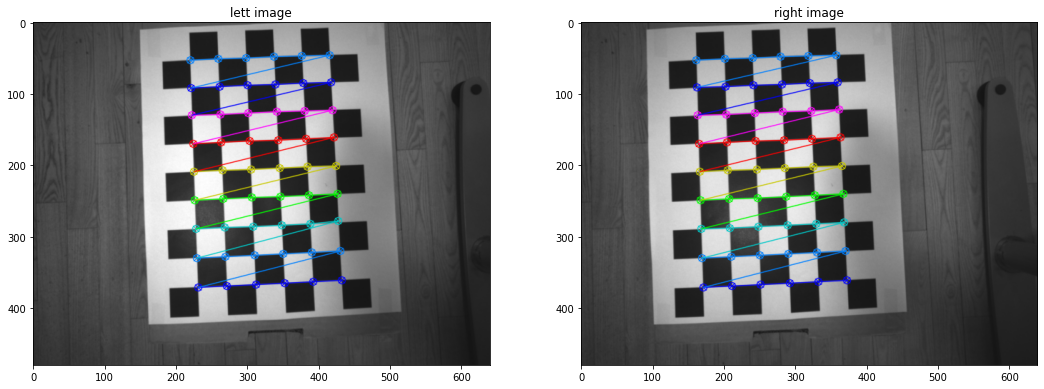

In [7]:
img_right = cv2.imread('rs/right-0010.png')
img_left = cv2.imread('rs/left-0010.png')

h,  w = img_right.shape[:2]

nb_vertical = 6
nb_horizontal = 9


dst_right = img_right
dst_left = img_left

ret_left, corners_left = cv2.findChessboardCorners(dst_left, (nb_vertical,nb_horizontal))
ret_right, corners_right = cv2.findChessboardCorners(dst_right, (nb_vertical,nb_horizontal))



img_left = cv2.drawChessboardCorners(img_left, (nb_vertical,nb_horizontal), corners_left,ret_left)
img_right = cv2.drawChessboardCorners(img_right, (nb_vertical,nb_horizontal), corners_right,ret_right)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img_left)
ax[0].set_title('lett image')
ax[1].imshow(img_right)
ax[1].set_title('right image')

'''

nb_matches = 200

good = []
pts1 = []
pts2 = []

for m in matches[:nb_matches]:
    good.append(m)
    pts1.append(kp1[m.queryIdx].pt)
    pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

'''

pts_left = np.floor(corners_left)
pts_right = np.floor(corners_right)


F, mask = cv2.findFundamentalMat(pts_left, pts_right, cv2.FM_RANSAC)

# We select only inlier points
pts_left = pts_left[mask.ravel() == 1]
pts_right = pts_right[mask.ravel() == 1]


retval, H_left, H_right = cv2.stereoRectifyUncalibrated(pts_left,pts_right,F,(w,h))

rect_left = cv2.warpPerspective(dst_left, H_left, (w,h))
rect_right = cv2.warpPerspective(dst_right, H_right, (w,h))


In [8]:
# print(corners_left.shape)
# print(np.min(corners_left[:,0,1]))

# print(np.floor(corners_left)-np.floor(corners_right))

Text(0.5, 1.0, 'Undistorted image')

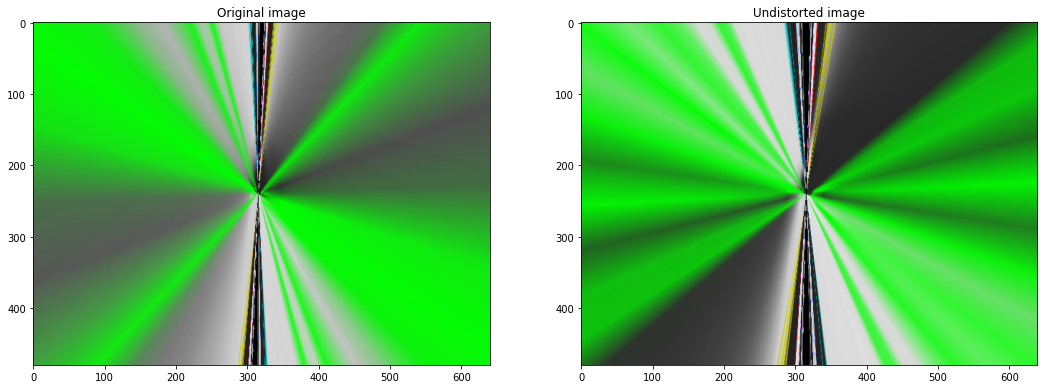

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(rect_left)
ax[0].set_title('Original image')
ax[1].imshow(rect_right)
ax[1].set_title('Undistorted image')

In [10]:
print(corners_left)

[[[431.95596  360.58804 ]]

 [[392.13818  362.79398 ]]

 [[352.18475  365.11893 ]]

 [[311.51395  366.7864  ]]

 [[271.221    368.71725 ]]

 [[230.63629  370.56177 ]]

 [[429.67075  320.11533 ]]

 [[389.9709   322.1688  ]]

 [[350.13474  324.27582 ]]

 [[309.7171   326.2546  ]]

 [[269.49905  327.97028 ]]

 [[229.33948  329.62177 ]]

 [[427.       278.      ]]

 [[387.957    281.7757  ]]

 [[348.3001   283.67487 ]]

 [[308.0131   285.55472 ]]

 [[267.93454  287.44528 ]]

 [[227.78525  289.24957 ]]

 [[425.5981   240.247   ]]

 [[386.1262   241.9513  ]]

 [[346.37912  243.60345 ]]

 [[306.40387  245.49104 ]]

 [[266.42868  247.2593  ]]

 [[226.38991  249.07578 ]]

 [[423.54224  200.62892 ]]

 [[384.07724  202.30457 ]]

 [[344.5036   203.95284 ]]

 [[304.62595  205.59038 ]]

 [[264.8336   207.4249  ]]

 [[224.83215  209.15144 ]]

 [[421.44348  161.43047 ]]

 [[382.19897  162.97083 ]]

 [[342.66345  164.52446 ]]

 [[303.06937  166.1966  ]]

 [[263.4423   167.92865 ]]

 [[223.64124  169.60